In [1]:
import os
import torch
import datetime
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from utils import *
from dataset import *
from model import *

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = "cpu"
print(device)

cuda:0


In [2]:
values2classes,classes2values,class2idx,idx2class = readClassLabels()
data_folder = "CamVid"

train_folder,train_labels_folder = os.path.join(data_folder,"train"),os.path.join(data_folder,"train_labels")
val_folder,val_labels_folder = os.path.join(data_folder,"val"),os.path.join(data_folder,"val_labels")
test_folder,test_labels_folder = os.path.join(data_folder,"test"),os.path.join(data_folder,"test_labels")

In [3]:
images_transforms = transforms.Compose([
    transforms.Resize((572,572)),
    transforms.ToTensor(),
    CustomNormalizeTransform()
])
labels_transforms = transforms.Compose([
    transforms.Resize((388,388),interpolation=transforms.InterpolationMode.NEAREST),
])

In [4]:
train_data = CamVidDataset(train_folder,train_labels_folder,transform=images_transforms,labels_transform=labels_transforms)
val_data = CamVidDataset(val_folder,val_labels_folder,transform=images_transforms,labels_transform=labels_transforms)
test_data = CamVidDataset(test_folder,test_labels_folder,transform=images_transforms,labels_transform=labels_transforms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images batch shape: torch.Size([1, 3, 572, 572])
Labels batch shape: torch.Size([1, 3, 388, 388])


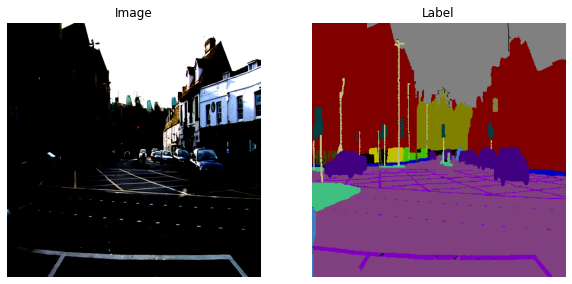

In [5]:
batch_size = 1
epochs = 5
trainLoaders = {}

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


trainLoaders["train"] = train_dataloader
trainLoaders["val"] = val_dataloader

for i,batch in enumerate(iter(train_dataloader)):
    
    images,labels = batch["image"],batch["label"]
    idx = np.random.randint(0,len(images))
    if i < 1:
        print(f"images batch shape: {images.size()}")
        print(f"Labels batch shape: {labels.size()}")
        sample = (images[idx],labels[idx])
        showSample(sample)

In [6]:
lr = 0.0001
filename = f"unet-weights-{lr}"
torch.cuda.empty_cache()
model = UNET(noClasses=32).to(device)

In [7]:
optimizer = torch.optim.Adam(model.parameters(),lr = lr)

In [8]:
params_to_update = model.parameters()
print("Params to learn:")
s = 0
params_to_update = []
for name,param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        s+=param.data.reshape(-1).shape[0]

print(s)


Params to learn:
31033760


In [10]:
trainedModel = train_model(model,trainLoaders,segmentationLoss,optimizer,
                           values2classes,num_epochs=20,device=device,isSave=True,filename=filename,verbose = False)

Epoch 0/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0
train current epoch Loss: 0.8892348947402261


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0
val current epoch Loss: 0.8965363249182701
Epoch 1/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.8892348947402261
train current epoch Loss: 0.8592247500167629


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.8965363249182701
val current epoch Loss: 0.8919975471496582
Epoch 2/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.8592247500167629
train current epoch Loss: 0.8128491275032684


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.8919975471496582
val current epoch Loss: 0.858121984899044
Epoch 3/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.8128491275032684
train current epoch Loss: 0.8055994013945261


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.858121984899044
val current epoch Loss: 0.8332896435260773
Epoch 4/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.8055994013945261
train current epoch Loss: 0.7612060767202197


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.8332896435260773
val current epoch Loss: 0.8426371079683304
Epoch 5/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.7612060767202197
train current epoch Loss: 0.736646699469264


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.8426371079683304
val current epoch Loss: 0.8408653491735458
Epoch 6/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.736646699469264
train current epoch Loss: 0.7286984130619018


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.8408653491735458
val current epoch Loss: 0.7965847894549369
Epoch 7/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.7286984130619018
train current epoch Loss: 0.6925943764406168


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.7965847894549369
val current epoch Loss: 0.8050370272994042
Epoch 8/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.6925943764406168
train current epoch Loss: 0.6634039251300378


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.8050370272994042
val current epoch Loss: 0.8186574575304985
Epoch 9/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.6634039251300378
train current epoch Loss: 0.6489650561072962


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.8186574575304985
val current epoch Loss: 0.7684448301792145
Epoch 10/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.6489650561072962
train current epoch Loss: 0.6217722434015455


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.7684448301792145
val current epoch Loss: 0.7655362913012504
Epoch 11/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.6217722434015455
train current epoch Loss: 0.6062536320389125


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.7655362913012504
val current epoch Loss: 0.7720516148209572
Epoch 12/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.6062536320389125
train current epoch Loss: 0.5891937345347107


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.7720516148209572
val current epoch Loss: 0.781001761853695
Epoch 13/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.5891937345347107
train current epoch Loss: 0.5715455271929584


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.781001761853695
val current epoch Loss: 0.7854597952961921
Epoch 14/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.5715455271929584
train current epoch Loss: 0.5583111945045026


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.7854597952961921
val current epoch Loss: 0.7702688404917717
Epoch 15/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.5583111945045026
train current epoch Loss: 0.528458203242077


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.7702688404917717
val current epoch Loss: 0.7652874594926834
Epoch 16/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.528458203242077
train current epoch Loss: 0.5049253594342286


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.7652874594926834
val current epoch Loss: 0.8095257905125618
Epoch 17/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.5049253594342286
train current epoch Loss: 0.49005430666250266


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.8095257905125618
val current epoch Loss: 0.7728118735551834
Epoch 18/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.49005430666250266
train current epoch Loss: 0.4943604065069984


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.7728118735551834
val current epoch Loss: 0.7732776573300362
Epoch 19/19
----------


Predicting ...:   0%|          | 0/369 [00:00<?, ?it/s]

train prev epoch Loss: 0.4943604065069984
train current epoch Loss: 0.4768556000659782


Predicting ...:   0%|          | 0/100 [00:00<?, ?it/s]

val prev epoch Loss: 0.7732776573300362
val current epoch Loss: 0.7699412421882152

Training complete in 56m 36s
Best val loss: 0.765287


In [9]:
model.load_state_dict(torch.load(f"trained/{filename}"))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.5510, device='cuda:0')


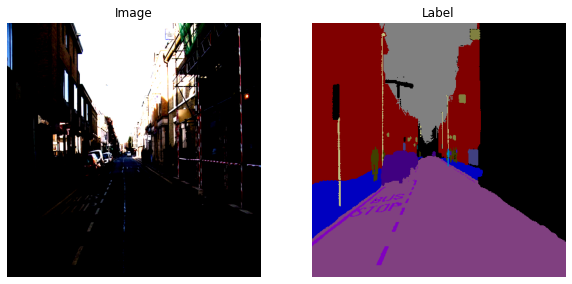

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


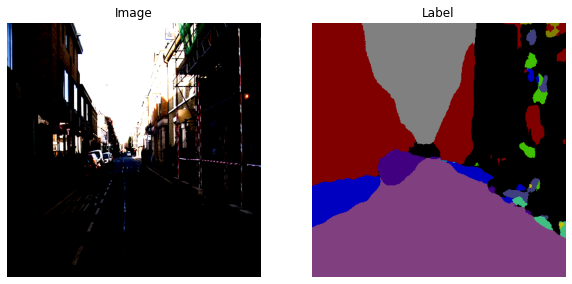

In [10]:
inputs = torch.zeros((1,3,572,572)).to(device)
labels = torch.zeros((1,3,388,388),dtype = torch.int64).to(device)
data = train_data

for i in range(1):
    
    idx = torch.randint(low = 0,high = len(data),size = (1,)).item()

    inputs[i] = data[idx]["image"]

    labels[i] = data[idx]["label"]


model.eval()
preds = model(inputs).detach()
# preds = toOneHot(generateMask(labels[0],values2classes)).unsqueeze(0)
preds_mask = torch.softmax(preds,dim = 1)
preds_mask = torch.argmax(preds_mask.squeeze(0),dim = 0)
preds_unmasked = unmask(preds_mask,classes2values)
print(segmentationLoss(preds,labels,values2classes))

sample =(data[idx]["image"],labels[0].cpu())
showSample(sample)
sample =(data[idx]["image"],preds_unmasked.cpu())
out = showSample(sample)


torch.Size([3, 720, 960]) torch.Size([3, 572, 572])


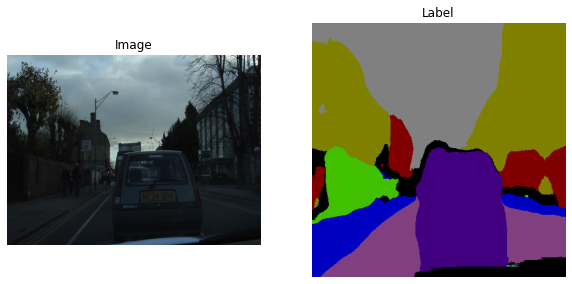

(388, 388, 3)


In [4]:
from run import *
run("CamVid/train/0001TP_009450.png","trained/unet-weights-0.0001")